In [ ]:
!git clone https://github.com/tianyi-lab/FaSTAR.git
%cd FaSTAR

## Visualize Input Image and the Prompt

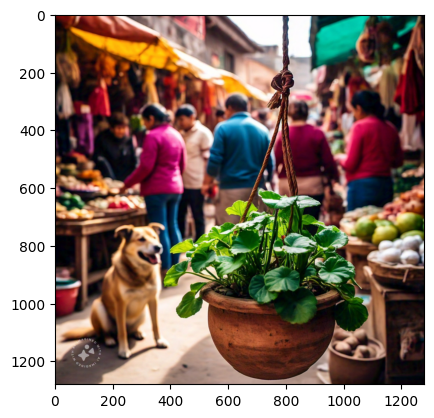

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML

img_path = "40.jpeg"
img = Image.open(img_path)
prompt_text2 = "Input Image:"
html_text2 = f"<div style='font-size: 18px;'>{prompt_text2}</div>"
display(HTML(html_text2))
plt.imshow(np.array(img))
plt.axis('on')
plt.show()
print("\n")
input_prompt = "40.txt"

with open(input_prompt, 'r') as file:
    prompt_text = file.read()

prompt_text1 = "Input Prompt:"
html_text = f"<div style='font-size: 18px;'>{prompt_text}</div>"
html_text1 = f"<div style='font-size: 20px;'>{prompt_text1}</div>"

display(HTML(html_text1))
display(HTML(html_text))

## Generate Subtask Chain for the Task

In [47]:
from subtask_chain import generate_subtask_chain
import json

# Set your OpenAI API key. Ensure you have access to api for the openAI o3 model
llm_api_key = "your_openai_api_key"

# Generate the subtask chain by calling the function.
subtask_chain_final = generate_subtask_chain(llm_api_key, img_path, prompt_text)

subtask_chain_json = json.dumps(subtask_chain_final, indent=4)
print(subtask_chain_json)

with open("Chain.json", "w") as f:
    f.write(subtask_chain_json)

{
    "task": "Segment the dog, detect the person, recolor the leaves to red, and expand the image",
    "subtask_chain": [
        {
            "subtask": "Outpainting ()(1)",
            "parent": []
        },
        {
            "subtask": "Object Segmentation (Dog) (2)",
            "parent": [
                "Outpainting ()(1)"
            ]
        },
        {
            "subtask": "Object Detection (Person) (3)",
            "parent": [
                "Object Segmentation (Dog) (2)"
            ]
        },
        {
            "subtask": "Object Recoloration (Leaves -> Red Leaves) (4)",
            "parent": [
                "Object Detection (Person) (3)"
            ]
        }
    ]
}


### Visualize Subtask Chain as a graph image

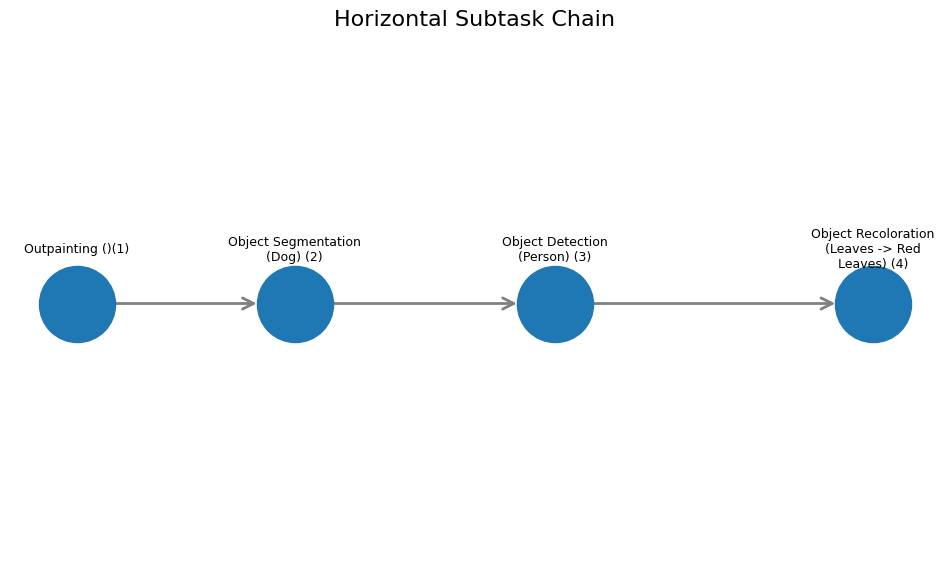

In [48]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import textwrap

def visualize_json_chain_horizontal(json_data):
    try:
        subtask_chain = json_data.get("subtask_chain", [])
        if not subtask_chain:
            print("No 'subtask_chain' found in the JSON data.")
            return

        graph_nx = nx.DiGraph()
        for subtask_data in subtask_chain:
            subtask = subtask_data["subtask"]
            parents = subtask_data["parent"]
            graph_nx.add_node(subtask)
            for parent in parents:
                if parent in graph_nx:
                    graph_nx.add_edge(parent, subtask)
                else:
                    print(f"Warning: Parent node '{parent}' not found for subtask '{subtask}'.")

        fig, ax = plt.subplots(figsize=(12, 7))

        try:
            graph_nx.graph['graph'] = {'rankdir': 'LR'}
            pos = nx.nx_pydot.graphviz_layout(graph_nx, prog='dot')
        except ImportError:
            print("Error: PyDot and Graphviz are required for the hierarchical layout.")
            print("Please install them: pip install pydot graphviz")
            print("Falling back to a simpler layout.")
            pos = nx.spring_layout(graph_nx) # Fallback layout
        except Exception as e:
            print(f"An error occurred with the layout engine: {e}")
            print("Falling back to a simpler layout.")
            pos = nx.spring_layout(graph_nx)

        labels = {node: '\n'.join(textwrap.wrap(node, width=20)) for node in graph_nx.nodes()}

        nx.draw_networkx_nodes(graph_nx, pos, ax=ax, node_size=3000, node_color='#1f77b4', node_shape='o')

        nx.draw_networkx_edges(graph_nx, pos, ax=ax, node_size=3000, arrowstyle='->',
                               arrowsize=20, edge_color='gray', width=2)

        font_size = 9
        label_pos = {k: (v[0]-0.5, v[1] + 0.3) for k, v in pos.items()}

        nx.draw_networkx_labels(graph_nx, label_pos, ax=ax, labels=labels, font_size=font_size, font_color='black')

        x_coords, y_coords = zip(*pos.values())
        x_padding = 70
        y_padding = 1.5
        ax.set_xlim(min(x_coords) - x_padding, max(x_coords) + x_padding)
        ax.set_ylim(min(y_coords) - y_padding, max(y_coords) + y_padding)


        ax.set_title("Horizontal Subtask Chain", size=16)
        plt.box(False)

        # print("Displaying visualization...")
        plt.show()

        plt.close()

    except ImportError as e:
        if 'matplotlib' in str(e):
            print("Error: The 'matplotlib' library is required.")
            print("Please install it using: pip install matplotlib")
        else:
             print(f"An import error occurred: {e}")
    except Exception as e:
        print(f"An error occurred during visualization: {e}")

if __name__ == '__main__':
    try:
        with open('Chain.json', 'r') as f:
            data = json.load(f)
            visualize_json_chain_horizontal(data)
    except FileNotFoundError:
        print("Error: 'Chain.json' not found. Please create this file with your subtask data.")
    except json.JSONDecodeError:
        print("Error: Could not decode JSON from 'Chain.json'. Please ensure it is a valid JSON file.")


## Generate High-Level Plan by replacing each subtask with corresponding selected subroutine


In [49]:
!python subroutine.py
#Stored as Sub.json

{
    "Outpainting ()(1)": [
        "None"
    ],
    "Object Segmentation (Dog)(2)": [
        "None"
    ],
    "Object Detection (Person)(3)": [
        "None"
    ],
    "Object Recoloration (Leaves -> Red Leaves)(4)": [
        "SR1",
        "SR2"
    ]
}


## Execute main script to traverse the High-Level Plan and Fallback to Low-Level if required.

Input Image:


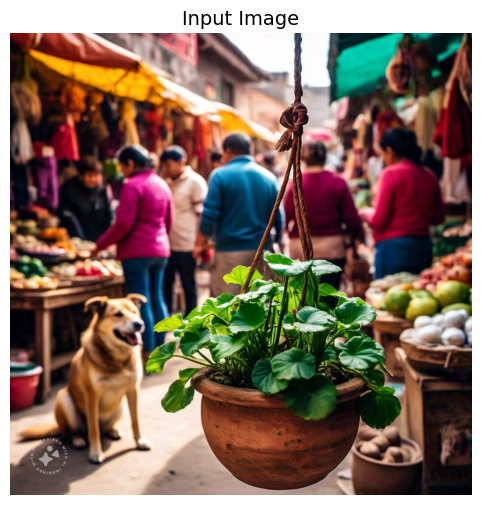


Input Prompt: Segment the dog, detect the person, recolor the leaves to red, and expand the image

High Level Plan:
{
    "Outpainting ()(1)": [
        "None"
    ],
    "Object Segmentation (Dog)(2)": [
        "None"
    ],
    "Object Detection (Person)(3)": [
        "None"
    ],
    "Object Recoloration (Leaves -> Red Leaves)(4)": [
        "SR1",
        "SR2"
    ]
}


High-Level Plan Execution:

Output for Outpainting ()(1):
Subroutines Selected: None
High Level Plan Failed- None encountered. Fallback to Low-Level
Generating ToolSubgraph for the Subtask:
ToolSubgraph: {
    "Input Image": [
        "StabilityOutpaint (Outpainting ()(1))"
    ],
    "StabilityOutpaint (Outpainting ()(1))": []
}


/tmp/ipython-input-68-3272162016.py:58: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.



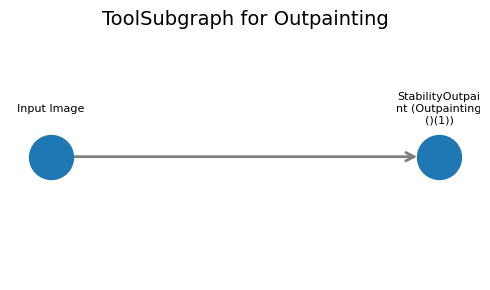

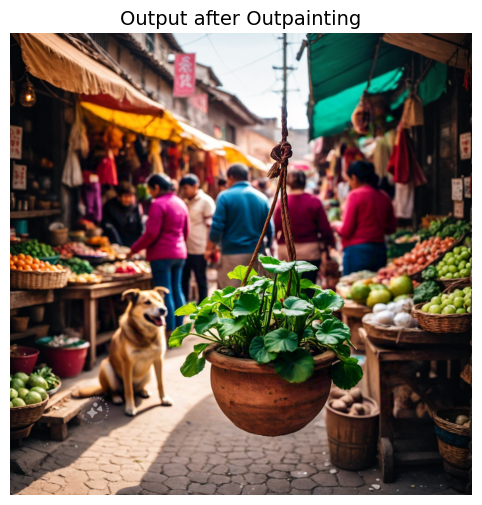


We use StabilityOutpaint for performing outpainting as part of the Outpainting subtask.
The output image is expanded.

--------------------------------------------------

Output for Object Segmentation (Dog)(2):
Subroutines Selected: None
High Level Plan Failed- None encountered. Fallback to Low-Level
Generating ToolSubgraph for the Subtask:
ToolSubgraph: {
    "Input Image": [
        "YOLOv7 (Object Segmentation (Dog)(2))",
        "GroundingDINO (Object Segmentation (Dog)(2))"
    ],
    "YOLOv7 (Object Segmentation (Dog)(2))": [
        "SAM (Object Segmentation (Dog)(2))"
    ],
    "GroundingDINO (Object Segmentation (Dog)(2))": [
        "SAM (Object Segmentation (Dog)(2))"
    ],
    "SAM (Object Segmentation (Dog)(2))": []
}


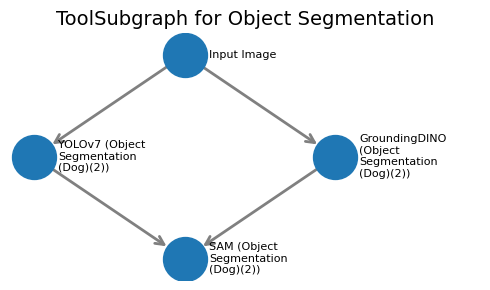

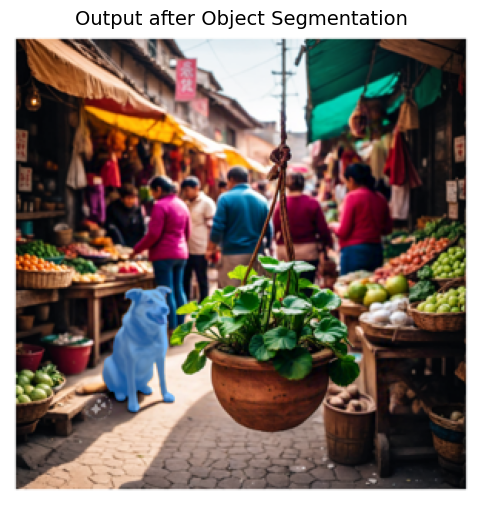


We use GroundingDINO for detecting and then SAM for segmenting dog as part of the Object Segmentation subtask.
The output image has a mask around dog.

--------------------------------------------------

Output for Object Detection (Person)(3):
Subroutines Selected: None
High Level Plan Failed- None encountered. Fallback to Low-Level
Generating ToolSubgraph for the Subtask:
ToolSubgraph: {
    "Input Image": [
        "YOLOv7 (Object Detection (Person)(3))",
        "GroundingDINO (Object Detection (Person)(3))"
    ],
    "YOLOv7 (Object Detection (Person)(3))": [],
    "GroundingDINO (Object Detection (Person)(3))": []
}


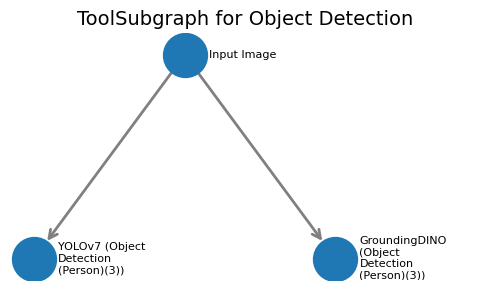

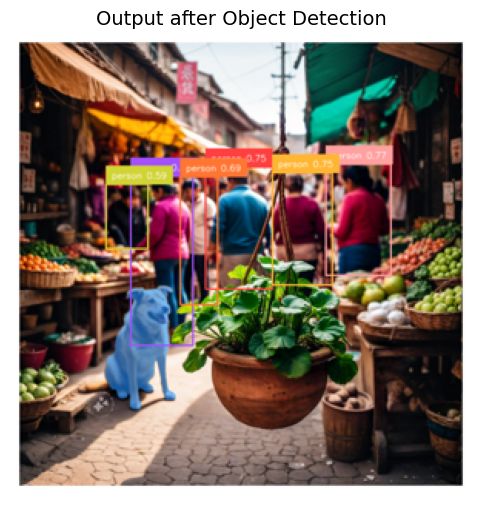


We use GroundingDINO for detecting person as part of the Object Detection subtask.
The output image has a bounding box drawn around person.

--------------------------------------------------

Output for Object Recoloration (Leaves -> Red Leaves)(4):
Subroutines Selected: SR1, SR2

alpha = 0
Final Subroutine Selected based on formula: SR2

Subroutine Path:
Path: {
    "Input Image": [
        "StabilitySearchRecolor (Object Recoloration (Leaves -> Red Leaves)(4))"
    ],
    "StabilitySearchRecolor (Object Recoloration (Leaves -> Red Leaves)(4))": []
}


/tmp/ipython-input-68-3272162016.py:58: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.



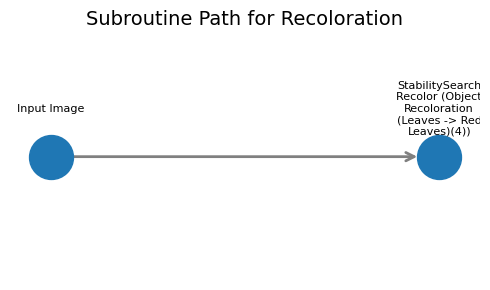


High Level Plan Succeeded.


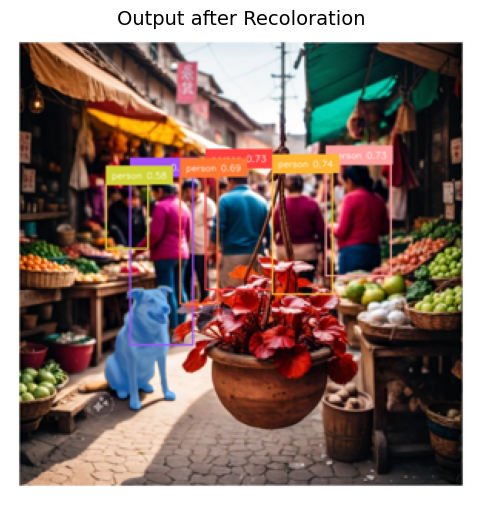


We use StabilitySearchRecolor for recoloring Leaves -> Red Leaves as part of the Object Recoloration subtask.
The Leaves has been recolored to Red in the output image.


FINAL OUTPUT:


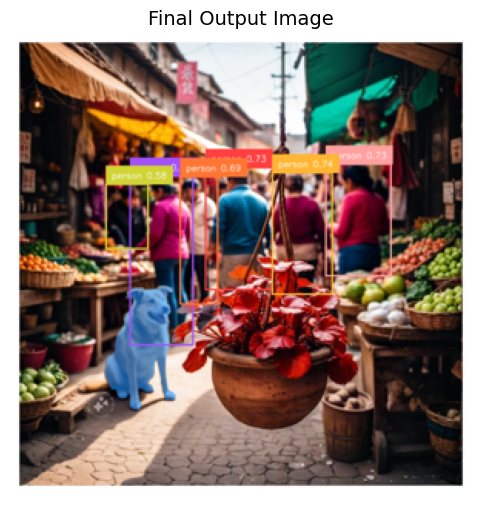

In [68]:
import os
import json
import fast_slow_planner

def load_from_subtask_chain_file(llm_api_key, image_path, prompt_text):
    with open('Chain.json', 'r') as f:
        return json.load(f)

def load_from_subroutine_file(llm_api_key, output_chain, image_path, prompt_text, subroutine_table):
    with open('Sub.json', 'r') as f:
        return json.load(f)

fast_slow_planner.generate_subtask_chain = load_from_subtask_chain_file
fast_slow_planner.generate_subroutine = load_from_subroutine_file

def run_planner():
    image_path = img_path
    prompt_text = prompt_text
    output_image_file = "final_output.png"

    fast_slow_planner.execute_fast_slow_planning(
        image_path=image_path,
        prompt_text=prompt_text,
        output_image=output_image_file
    )


if __name__ == "__main__":
    if not os.getenv("OPENAI_API_KEY"):
        raise ValueError("FATAL: OPENAI_API_KEY environment variable is not set.")

    run_planner()